# Data Science Project

## Cricket Score Predictor

In [2]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler,OneHotEncoder

In [3]:
df=pd.read_csv('deliveries.csv')
df


,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150455,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
150456,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha
150457,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
150458,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN


In [4]:
df.describe()

,match_id,inning,over,ball,is_super_over,wide_runs,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs
count,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000,150460.000000
mean,318.281317,1.482188,10.142649,3.616483,0.000538,0.037498,0.004885,0.022232,0.004340,0.000066,1.222445,0.069022,1.291466
std,182.955531,0.501768,5.674338,1.807698,0.023196,0.257398,0.114234,0.200104,0.072652,0.018229,1.594509,0.349667,1.583240
min,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,161.000000,1.000000,5.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,319.000000,1.000000,10.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
75%,476.000000,2.000000,15.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000
max,636.000000,4.000000,20.000000,9.000000,1.000000,5.000000,4.000000,5.000000,5.000000,5.000000,6.000000,7.000000,7.000000


In [5]:
df.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [6]:
df.tail()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
150455,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,2,0,2,NaN,NaN,NaN
150456,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha
150457,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,...,0,1,0,0,0,1,1,NaN,NaN,NaN
150458,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,...,0,0,0,0,1,0,1,NaN,NaN,NaN
150459,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,6,Iqbal Abdulla,Sachin Baby,B Kumar,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          150460 non-null  int64 
 1   inning            150460 non-null  int64 
 2   batting_team      150460 non-null  object
 3   bowling_team      150460 non-null  object
 4   over              150460 non-null  int64 
 5   ball              150460 non-null  int64 
 6   batsman           150460 non-null  object
 7   non_striker       150460 non-null  object
 8   bowler            150460 non-null  object
 9   is_super_over     150460 non-null  int64 
 10  wide_runs         150460 non-null  int64 
 11  bye_runs          150460 non-null  int64 
 12  legbye_runs       150460 non-null  int64 
 13  noball_runs       150460 non-null  int64 
 14  penalty_runs      150460 non-null  int64 
 15  batsman_runs      150460 non-null  int64 
 16  extra_runs        150460 non-null  int

In [8]:
numerical_features = df.select_dtypes(include='int64').columns
print("\nNumerical Columns:")
print(numerical_features)


Numerical Columns:
Index(['match_id', 'inning', 'over', 'ball', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs'],
      dtype='object')


In [9]:
for column in numerical_features:
    column_range = df[column].max() - df[column].min()
    print(f"Range of '{column}': {column_range}")


Range of 'match_id': 635
Range of 'inning': 3
Range of 'over': 19
Range of 'ball': 8
Range of 'is_super_over': 1
Range of 'wide_runs': 5
Range of 'bye_runs': 4
Range of 'legbye_runs': 5
Range of 'noball_runs': 5
Range of 'penalty_runs': 5
Range of 'batsman_runs': 6
Range of 'extra_runs': 7
Range of 'total_runs': 7


In [10]:
features_to_scale=['match_id','over','extra_runs','total_runs','ball','wide_runs','legbye_runs',
                   'noball_runs','penalty_runs','batsman_runs']

scaler_standard = StandardScaler()
df_standard_scaled = pd.DataFrame(scaler_standard.fit_transform(df[features_to_scale]), columns=features_to_scale)
print("\nDataset After Standardization (Z-score Normalization):")
df_standard_scaled


Dataset After Standardization (Z-score Normalization):


,match_id,over,extra_runs,total_runs,ball,wide_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs
0,-1.734205,-1.611233,-0.197393,-0.815713,-1.447417,-0.145683,-0.111102,-0.059737,-0.003646,-0.766661
1,-1.734205,-1.611233,-0.197393,-0.815713,-0.894225,-0.145683,-0.111102,-0.059737,-0.003646,-0.766661
2,-1.734205,-1.611233,-0.197393,1.710759,-0.341033,-0.145683,-0.111102,-0.059737,-0.003646,1.741956
3,-1.734205,-1.611233,-0.197393,-0.815713,0.212159,-0.145683,-0.111102,-0.059737,-0.003646,-0.766661
4,-1.734205,-1.611233,5.522348,0.447523,0.765350,7.624425,-0.111102,-0.059737,-0.003646,-0.766661
...,...,...,...,...,...,...,...,...,...,...
150455,1.736595,1.737187,-0.197393,0.447523,-0.894225,-0.145683,-0.111102,-0.059737,-0.003646,0.487647
150456,1.736595,1.737187,-0.197393,-0.815713,-0.341033,-0.145683,-0.111102,-0.059737,-0.003646,-0.766661
150457,1.736595,1.737187,2.662477,-0.184095,0.212159,-0.145683,4.886311,-0.059737,-0.003646,-0.766661
150458,1.736595,1.737187,-0.197393,-0.184095,0.765350,-0.145683,-0.111102,-0.059737,-0.003646,-0.139507


In [12]:
categorical_features = df.select_dtypes(include='object').columns
print("\nCategorical Columns:")
print(numerical_features)


Categorical Columns:
Index(['match_id', 'inning', 'over', 'ball', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs'],
      dtype='object')


In [13]:
df.columns

Index(['match_id', 'inning', 'batting_team', 'bowling_team', 'over', 'ball',
       'batsman', 'non_striker', 'bowler', 'is_super_over', 'wide_runs',
       'bye_runs', 'legbye_runs', 'noball_runs', 'penalty_runs',
       'batsman_runs', 'extra_runs', 'total_runs', 'player_dismissed',
       'dismissal_kind', 'fielder'],
      dtype='object')

# handling missing values

In [15]:
df['player_dismissed'].fillna('None',inplace = True)

C:\Users\araaf\AppData\Local\Temp\ipykernel_5052\1236373798.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['player_dismissed'].fillna('None',inplace = True)


In [16]:
df['dismissal_kind'].fillna('None',inplace = True)

C:\Users\araaf\AppData\Local\Temp\ipykernel_5052\148908418.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['dismissal_kind'].fillna('None',inplace = True)


In [17]:
df['fielder'].fillna('None',inplace = True)

C:\Users\araaf\AppData\Local\Temp\ipykernel_5052\3621691392.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['fielder'].fillna('None',inplace = True)


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          150460 non-null  int64 
 1   inning            150460 non-null  int64 
 2   batting_team      150460 non-null  object
 3   bowling_team      150460 non-null  object
 4   over              150460 non-null  int64 
 5   ball              150460 non-null  int64 
 6   batsman           150460 non-null  object
 7   non_striker       150460 non-null  object
 8   bowler            150460 non-null  object
 9   is_super_over     150460 non-null  int64 
 10  wide_runs         150460 non-null  int64 
 11  bye_runs          150460 non-null  int64 
 12  legbye_runs       150460 non-null  int64 
 13  noball_runs       150460 non-null  int64 
 14  penalty_runs      150460 non-null  int64 
 15  batsman_runs      150460 non-null  int64 
 16  extra_runs        150460 non-null  int

# One Hot and Label Encoding

In [20]:
dfs = df

In [21]:
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   match_id          150460 non-null  int64 
 1   inning            150460 non-null  int64 
 2   batting_team      150460 non-null  object
 3   bowling_team      150460 non-null  object
 4   over              150460 non-null  int64 
 5   ball              150460 non-null  int64 
 6   batsman           150460 non-null  object
 7   non_striker       150460 non-null  object
 8   bowler            150460 non-null  object
 9   is_super_over     150460 non-null  int64 
 10  wide_runs         150460 non-null  int64 
 11  bye_runs          150460 non-null  int64 
 12  legbye_runs       150460 non-null  int64 
 13  noball_runs       150460 non-null  int64 
 14  penalty_runs      150460 non-null  int64 
 15  batsman_runs      150460 non-null  int64 
 16  extra_runs        150460 non-null  int

In [22]:
df

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,None,None,None
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,None,None,None
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,None,None,None
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,None,None,None
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150455,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,2,0,2,None,None,None
150456,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,CJ Jordan,B Kumar,0,...,0,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha
150457,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,0,...,0,1,0,0,0,1,1,None,None,None
150458,636,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,0,...,0,0,0,0,1,0,1,None,None,None


In [23]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

# One-hot encode specific columns
df = pd.get_dummies(df, columns=['batting_team', 'bowling_team', 'is_super_over', 'dismissal_kind'])

# Label encode high-cardinality columns
label_cols = ['batsman', 'non_striker', 'bowler', 'fielder','player_dismissed']
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [24]:
df

,match_id,inning,over,ball,batsman,non_striker,bowler,wide_runs,bye_runs,legbye_runs,...,dismissal_kind_None,dismissal_kind_bowled,dismissal_kind_caught,dismissal_kind_caught and bowled,dismissal_kind_hit wicket,dismissal_kind_lbw,dismissal_kind_obstructing the field,dismissal_kind_retired hurt,dismissal_kind_run out,dismissal_kind_stumped
0,1,1,1,1,103,347,331,0,0,0,...,True,False,False,False,False,False,False,False,False,False
1,1,1,1,2,103,347,331,0,0,0,...,True,False,False,False,False,False,False,False,False,False
2,1,1,1,3,103,347,331,0,0,0,...,True,False,False,False,False,False,False,False,False,False
3,1,1,1,4,103,347,331,0,0,0,...,True,False,False,False,False,False,False,False,False,False
4,1,1,1,5,103,347,331,2,0,0,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150455,636,2,20,2,399,91,50,0,0,0,...,True,False,False,False,False,False,False,False,False,False
150456,636,2,20,3,399,91,50,0,0,0,...,False,False,False,False,False,False,False,False,True,False
150457,636,2,20,4,160,399,50,0,0,1,...,True,False,False,False,False,False,False,False,False,False
150458,636,2,20,5,399,161,50,0,0,0,...,True,False,False,False,False,False,False,False,False,False


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150460 entries, 0 to 150459
Data columns (total 57 columns):
 #   Column                                    Non-Null Count   Dtype
---  ------                                    --------------   -----
 0   match_id                                  150460 non-null  int64
 1   inning                                    150460 non-null  int64
 2   over                                      150460 non-null  int64
 3   ball                                      150460 non-null  int64
 4   batsman                                   150460 non-null  int32
 5   non_striker                               150460 non-null  int32
 6   bowler                                    150460 non-null  int32
 7   wide_runs                                 150460 non-null  int64
 8   bye_runs                                  150460 non-null  int64
 9   legbye_runs                               150460 non-null  int64
 10  noball_runs                               15

In [26]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, f_regression

over_totals = df.groupby(['match_id', 'inning', 'over'])['total_runs'].sum().reset_index()
over_totals.rename(columns={'total_runs': 'runs_per_over'}, inplace=True)
df = df.merge(over_totals, on=['match_id', 'inning', 'over'], how='left')
df_over = df[df['ball'] == 1].copy()

In [27]:

df_over['previous_runs_per_over'] = df_over.groupby(['match_id', 'inning'])['runs_per_over'].shift(1).fillna(0)
df_over['cumulative_runs_by_pair'] = df_over.groupby(['match_id', 'batsman', 'non_striker'])['total_runs'].cumsum().shift(1).fillna(0)
df_over['bowler_economy'] = df_over.groupby('bowler')['total_runs'].transform(lambda x: x.expanding().mean())
df_over['last_2_overs_avg'] = df_over.groupby(['match_id', 'inning'])['runs_per_over'].transform(lambda x: x.rolling(2, min_periods=1).mean())


X = df_over.drop('runs_per_over', axis=1)

y = df_over['runs_per_over']


selector = SelectKBest(score_func=f_regression, k='all')
selector.fit(X, y)


feature_scores = pd.DataFrame({'Feature': X.columns, 'Score': selector.scores_})

top_features = feature_scores.sort_values(by='Score', ascending=False).head(10)
print(top_features)


selector = SelectKBest(score_func=f_regression, k=5)
X_new = selector.fit_transform(X, y)


selected_features = X.columns[selector.get_support()]
print('Selected Features:')
print(selected_features)


corr = df_over.corr()
print('Correlation coefficient:')
corr

                    Feature         Score
60         last_2_overs_avg  36072.190021
14               total_runs   5343.783649
12             batsman_runs   4755.522804
2                      over    742.903529
57   previous_runs_per_over    654.235546
59           bowler_economy    444.489863
47      dismissal_kind_None    399.011215
49    dismissal_kind_caught    186.642253
58  cumulative_runs_by_pair    160.145152
13               extra_runs    131.587291
Selected Features:
Index(['over', 'batsman_runs', 'total_runs', 'previous_runs_per_over',
       'last_2_overs_avg'],
      dtype='object')
Correlation coefficient:


,match_id,inning,over,ball,batsman,non_striker,bowler,wide_runs,bye_runs,legbye_runs,...,dismissal_kind_lbw,dismissal_kind_obstructing the field,dismissal_kind_retired hurt,dismissal_kind_run out,dismissal_kind_stumped,runs_per_over,previous_runs_per_over,cumulative_runs_by_pair,bowler_economy,last_2_overs_avg
match_id,1.000000,0.000723,0.002518,NaN,-0.050878,-0.059507,-0.028417,-0.006410,-0.009613,-0.003843,...,-0.009246,NaN,NaN,-0.009667,0.009505,0.007517,0.005468,0.003315,0.004136,0.007673
inning,0.000723,1.000000,-0.042311,NaN,-0.012519,0.008870,-0.013161,-0.001200,-0.001300,0.003931,...,-0.002295,NaN,NaN,-0.006448,-0.001077,-0.022543,-0.016081,-0.020423,0.005377,-0.018878
over,0.002518,-0.042311,1.000000,NaN,-0.009148,-0.035957,-0.003886,-0.025505,0.008837,-0.015299,...,-0.005814,NaN,NaN,0.025252,0.008887,0.171910,0.282073,0.143869,0.035778,0.229823
ball,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
batsman,-0.050878,-0.012519,-0.009148,NaN,1.000000,-0.149487,0.002227,0.013830,0.002553,-0.012821,...,-0.008734,NaN,NaN,-0.007444,-0.002763,-0.000967,0.010556,0.003418,0.025242,-0.002076
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
runs_per_over,0.007517,-0.022543,0.171910,NaN,-0.000967,-0.010412,-0.007276,0.065895,0.020988,0.012316,...,-0.044987,NaN,NaN,-0.028346,-0.022193,1.000000,0.161611,0.080758,0.133770,0.772372
previous_runs_per_over,0.005468,-0.016081,0.282073,NaN,0.010556,-0.013061,0.000910,0.000008,0.007224,0.001049,...,-0.006701,NaN,NaN,0.016066,0.001627,0.161611,1.000000,0.259409,0.032857,0.712123
cumulative_runs_by_pair,0.003315,-0.020423,0.143869,NaN,0.003418,0.011425,0.006047,0.007696,0.003069,-0.011673,...,-0.005656,NaN,NaN,0.006480,-0.002357,0.080758,0.259409,1.000000,0.029512,0.234313
bowler_economy,0.004136,0.005377,0.035778,NaN,0.025242,-0.004234,0.000375,0.021401,-0.002385,0.025344,...,-0.009201,NaN,NaN,-0.004527,-0.011496,0.133770,0.032857,0.029512,1.000000,0.102907


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:483: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


Gradient Boosting - Mean Absolute Error: 0.08761319779074554
Gradient Boosting - Root Mean Square Error: 0.14927430196098465
Gradient Boosting - R² Score: 0.998905537902164



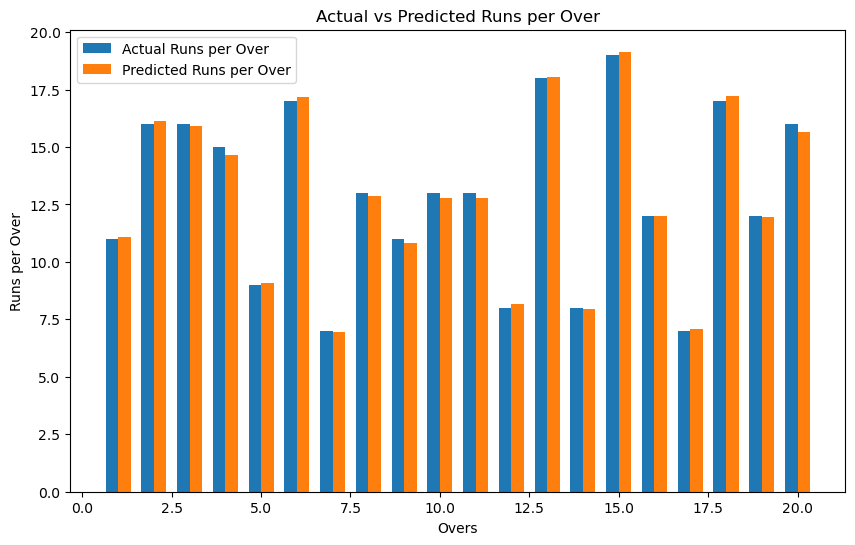

In [29]:



feature_columns = ['over', 'batsman_runs', 'total_runs', 'previous_runs_per_over', 'last_2_overs_avg']
X = df_over[feature_columns]
y = df_over['runs_per_over']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=40)


param_grid_gb = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'max_depth': [3, 4]
}


grid_search_gb = GridSearchCV(GradientBoostingRegressor(), param_grid_gb, cv=3, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search_gb.fit(X_train, y_train)
gb_model = grid_search_gb.best_estimator_


y_pred = gb_model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

print(f"Gradient Boosting - Mean Absolute Error: {mae}")
print(f"Gradient Boosting - Root Mean Square Error: {rmse}")
print(f"Gradient Boosting - R² Score: {r2}\n")


match_id = df_over['match_id'].iloc[0]  
match_data = df_over[df_over['match_id'] == match_id].copy()
match_data['predicted_runs_per_over'] = gb_model.predict(match_data[feature_columns])


fig, ax = plt.subplots(figsize=(10, 6))
width = 0.35

ax.bar(match_data['over'] - width/2, match_data['runs_per_over'], width=width, label='Actual Runs per Over')
ax.bar(match_data['over'] + width/2, match_data['predicted_runs_per_over'], width=width, label='Predicted Runs per Over')

ax.set_xlabel('Overs')
ax.set_ylabel('Runs per Over')
ax.set_title('Actual vs Predicted Runs per Over')
ax.legend()
plt.show()


In [30]:
def predict_runs_per_over(over, batsman_runs, total_runs, previous_runs_per_over, last_2_overs_avg):
    input_data = pd.DataFrame({
        'over': [over],
        'batsman_runs': [batsman_runs],
        'total_runs': [total_runs],
        'previous_runs_per_over': [previous_runs_per_over],
        'last_2_overs_avg': [last_2_overs_avg]
    })
    
    predicted_runs_per_over = gb_model.predict(input_data)[0]
    
    return predicted_runs_per_over


over = float(input("Enter the current over: "))
batsman_runs = float(input("Enter the batsman's current runs: "))
total_runs = float(input("Enter the total runs so far: "))
previous_runs_per_over = float(input("Enter the runs in the previous over: "))
last_2_overs_avg = float(input("Enter the average runs in the last 2 overs: "))

# Make the prediction
predicted_runs = predict_runs_per_over(over, batsman_runs, total_runs, previous_runs_per_over, last_2_overs_avg)
print(f"Predicted Runs for Over {over}: {predicted_runs}")


Enter the current over:  6
Enter the batsman's current runs:  5
Enter the total runs so far:  67
Enter the runs in the previous over:  8
Enter the average runs in the last 2 overs:  6


Predicted Runs for Over 6.0: 4.156385358620154
